# Importing Required Libraries

In [1]:
# Libraries for data collection and manipulation
import pandas as pd
#import numpy as np
import datetime as dt
import yfinance as yf

# Libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)


# Libraries for Time Series Analysis
from prophet import Prophet

# Importing helper functions
import sys
sys.path.insert(1, 'C:/Users/Woon/Desktop/Columbia/Applied Analytics/Term3/Sentiment_SNP')
import helper_functions
from helper_functions import *


# Libraries for NLP
from collections import defaultdict
from transformers import pipeline



# Libraries for Webscraping
from urllib.request import Request, urlopen
from urllib.error import HTTPError
import socket
import urllib


# Environment settings: 
import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

c:\Users\Woon\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



# Data Collection

In [2]:
text_input = input("Type in the Ticker: ")
print("You entered:", text_input)

You entered: spy


## Scrape Yahoo Finance News

In [3]:
now = dt.datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Report Date = ", dt.datetime.today())
print("Report Time =", current_time)
YAHOO_NEWS_URL = f'https://finance.yahoo.com/quote/{text_input}?p={text_input}&.tsrc=fin-srch'
news_df = scrape_yahoo_news(YAHOO_NEWS_URL)

Report Date =  2023-04-29 13:02:18.116383
Report Time = 13:02:18


# Feature Engineering

In [4]:
# Conduct sentiment analysis of the headline and add it as a column
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

sentiment = [None] * len(news_df)
sentiment_score = [None] * len(news_df)
index = -1
for sentence in news_df['headline']:
    index+=1
    result = sentiment_pipeline(sentence[:512])[0]
    sentiment[index] = result['label']
    sentiment_score[index] = result['score']
news_df['Sentiment'] = sentiment
news_df['Score'] = sentiment_score

# Conduct sentiment analysis of the abstract and add it as a column
sentiment = [None] * len(news_df)
sentiment_score = [None] * len(news_df)
index = -1
for sentence in news_df['content']:
    index+=1
    result = sentiment_pipeline(sentence[:512])[0]
    sentiment[index] = result['label']
    sentiment_score[index] = result['score']
news_df['Sentiment2'] = sentiment
news_df['Score2'] = sentiment_score

In [5]:
#news_df[news_df['Score'] > 0.8] 
news_df2 = news_df[news_df['Score'] > 0.8] [news_df[news_df['Score'] > 0.8] ['Score2'] > 0.8].reset_index()

In [6]:
news_df2.head(20)

,index,source,time,headline,content,Sentiment,Score,Sentiment2,Score2
0,0,Investor's Business Daily,9 days ago,Is SPY Stock A Buy Right Now? What To Know About World's Top Index,"If you own SPY stock, you'll never trail the S&P 500. The expense ratio is low and you're diversified across 500 stocks and 11 sectors. Just know, you'll never beat the market, either.",NEGATIVE,0.991594,NEGATIVE,0.904669
1,1,Zacks,11 days ago,5 ETFs Sizzle Last Week Amid Volatility,"Overall, ETFs pulled in $19.1 billion in capital for the week (ending Apr 14).",NEGATIVE,0.989956,NEGATIVE,0.951247
2,2,Zacks,15 days ago,U.S. Dollar Slips to One-Year Low: ETFs to Gain/Lose,"Due to cooling inflation and the likelihood of a dovish Fed in the near term, the greenback has slipped to a one-year low level. The currency may decline more ahead.",NEGATIVE,0.998792,NEGATIVE,0.999643
3,3,Zacks,17 days ago,Should SPDR S&P 500 ETF (SPY) Be on Your Investing Radar?,Style Box ETF report for SPY,NEGATIVE,0.998921,NEGATIVE,0.931347
4,5,The Wall Street Journal,23 days ago,"Options Investors Face Challenges in a Volatile, but Flat, Stock Market",The lack of a sustained move up or down in the market increases the likelihood that options contracts will expire worthless,NEGATIVE,0.998616,NEGATIVE,0.999663
5,6,Zacks,23 days ago,"Jobless Claims Makeover: 228K, 200K+ for 8 Weeks",Seasonal adjustments now show we've been above 200K new claims for the past eight weeks.,NEGATIVE,0.988532,NEGATIVE,0.975258
6,7,Motley Fool,24 days ago,Could This Alternative S&P 500 Index ETF Make You More Money Than the Most Popular ETFs?,"Is investing in index exchange-traded funds (ETFs) boring? Actually, an S&P 500 index fund offers a great way to retire as a millionaire. Two S&P 500 ETFs -- SPDR S&P 500 ETF Trust (NYSEMKT: SPY) and Vanguard 500 Index Fund ETF (NYSEMKT: VOO) -- are by far the most widely traded.",NEGATIVE,0.999154,NEGATIVE,0.808636
7,10,Yahoo Finance,29 days ago,The first quarter of the year sent investors back to the future: Morning Brief,"The tech sector's current boom feels like 2021, but there's a ton of differences between then and now.",NEGATIVE,0.970662,NEGATIVE,0.927400
8,11,etf.com,last month,Tech Charges QQQ as Nasdaq Enters Bull Market,The ETF’s 20% surge from its December low handily beats the broader market.,NEGATIVE,0.997395,POSITIVE,0.998760
9,12,Zacks,last month,Q4 GDP Ticks Down to +2.6%; Jobless Claims Stay Low,"Year over year GDP for 2022 comes in at +3.9%, 200 bps lower than the very strong 2021, which provided the Great Reopening from the Covid pandemic.",NEGATIVE,0.998402,NEGATIVE,0.989929


In [7]:
text_input2 = input("How many rows of news?: ")
text_input2 = int(text_input2)

# Sentiment

<AxesSubplot:xlabel='Sentiment', ylabel='Count'>

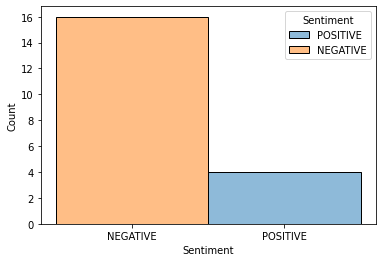

In [8]:
sns.histplot(x = 'Sentiment', data = news_df2[:text_input2], hue = 'Sentiment', hue_order=['POSITIVE', 'NEGATIVE'])

<AxesSubplot:xlabel='Sentiment', ylabel='Count'>

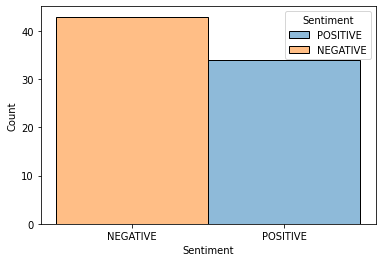

In [9]:
sns.histplot(x = 'Sentiment', data = news_df2, hue = 'Sentiment', hue_order=['POSITIVE', 'NEGATIVE'])

# Headline Trigram

In [10]:
## Get the bar chart from 5 rated reviews ##
freq_dict = defaultdict(int)
for sent in news_df["headline"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'green')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=600, width=600, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots');

# Content Trigram

In [11]:
## Get the bar chart from 5 rated reviews ##
freq_dict = defaultdict(int)
for sent in news_df["content"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'green')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=600, width=600, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots');

# Finviz

In [12]:
url = f"https://finviz.com/quote.ashx?t={text_input}&ty=c&ta=1&p=d"


headers = {"User-Agent": "Mozilla/5.0"}
cookies = {"CONSENT": "YES+cb.20210720-07-p0.en+FX+410"}

req = Request(url, headers=headers)

try:
    contents = urlopen(req).read() 
    soup = BeautifulSoup(contents, features="html.parser")

    sentence2 = []

    for tag in soup.find_all('a'):

        sentence = tag.text.split(".")
        sentence2.append(sentence)

except urllib.error.HTTPError as err:
    print(err.code)

except socket.timeout as se:
    print("socket timeout")

In [13]:
df = pd.DataFrame(sentence2)

In [14]:
df['Headline'] = df[0]
df['Sentiment'] = -2
df = pd.DataFrame(list(zip(df['Headline'], df['Sentiment'])), columns=['Headline', 'Sentiment'])

In [15]:
i = []

for string in df['Headline']:
    i.append(count_words(string))

df['word_count'] = i

In [16]:
sentiment = [None] * len(df)
sentiment_score = [None] * len(df)
index = -1
for sentence in df['Headline']:
    index+=1
    result = sentiment_pipeline(sentence[:512])[0]
    sentiment[index] = result['label']
    sentiment_score[index] = result['score']
df['Sentiment'] = sentiment
df['Score'] = sentiment_score

In [17]:
df = df[df['word_count'] > 10]
df['Headline_Lower'] = df['Headline'].str.lower()

<AxesSubplot:xlabel='Sentiment', ylabel='Count'>

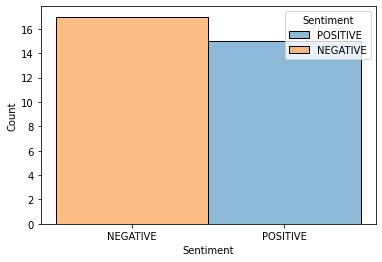

In [18]:
sns.histplot(x = 'Sentiment', data = df[df['Score'] > 0.8], hue = 'Sentiment', hue_order=['POSITIVE', 'NEGATIVE'])

In [19]:
## Get the bar chart from 5 rated reviews ##
freq_dict = defaultdict(int)
for sent in df["Headline_Lower"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(10), 'green')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=600, width=600, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots');

# Forecast

In [20]:
#Past 3 year data
spy_ohlc_df = yf.download(text_input, start=dt.datetime.today() - dt.timedelta(days=1095), end=dt.datetime.today())
df=spy_ohlc_df.reset_index()

[*********************100%***********************]  1 of 1 completed


In [21]:
start_time = pd.Timestamp(df['Date'][0])
end_time = pd.Timestamp(df['Date'][len(df)-1])
time_range = pd.date_range(start_time, end_time, freq=df['Date'][1] - df['Date'][0] )

time_list = time_range.tolist()


time_list = pd.to_datetime(time_list)
index = range(len(time_list))

df_dates = pd.DataFrame(index, columns = ['Date'])
df_dates['Date'] = time_list

#Ensure all reading time exists, fill with 0 for missing reading times
df = pd.merge(df, df_dates, on='Date', how='right')

df.fillna(method='ffill', inplace=True)

In [22]:
# fig, ax = plt.subplots()
# fig.set_size_inches(15,6)
# sns.lineplot(x = 'Date', y = 'Close', data = df)
# plt.show()

In [23]:
# Load SPY price data
spy_data = df
spy_data = df[['Date', 'Close']]
spy_data.columns = ['ds', 'y']

# Initialize Prophet model
model = Prophet()

# Fit the model on SPY data
model.fit(spy_data)

# Create future dates for forecasting
future_dates = model.make_future_dataframe(periods=365, include_history=False)

# Make predictions for future dates
forecast = model.predict(future_dates)

13:06:06 - cmdstanpy - INFO - Chain [1] start processing
13:06:06 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
# fig = model.plot(forecast, xlabel='Date', ylabel='SPY Price')
# fig.set_size_inches(15,6)
# plt.title('Forecasted Price')
# plt.xlabel('dt')
# plt.ylabel('Price')
# plt.show()

# One Year Outlook

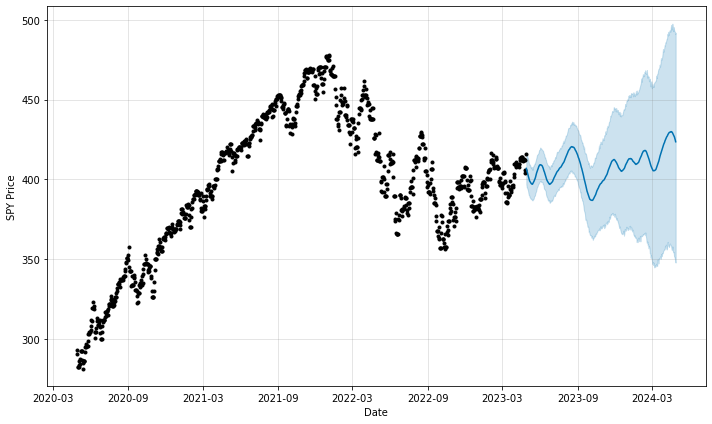

(18746.545919907523, 19841.545919907523)

(306.1873325751996, 510.31222095866605)

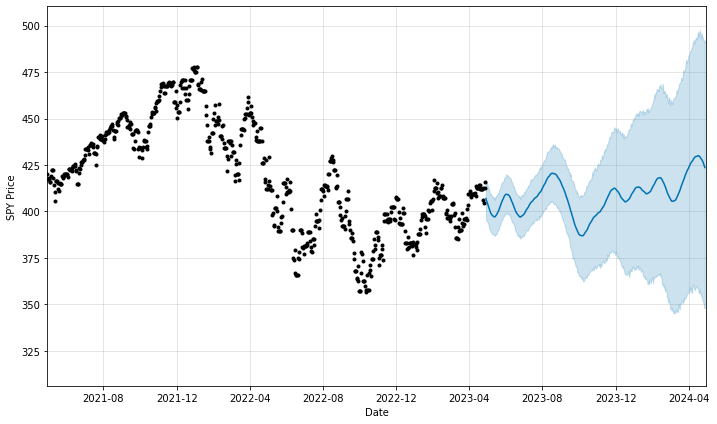

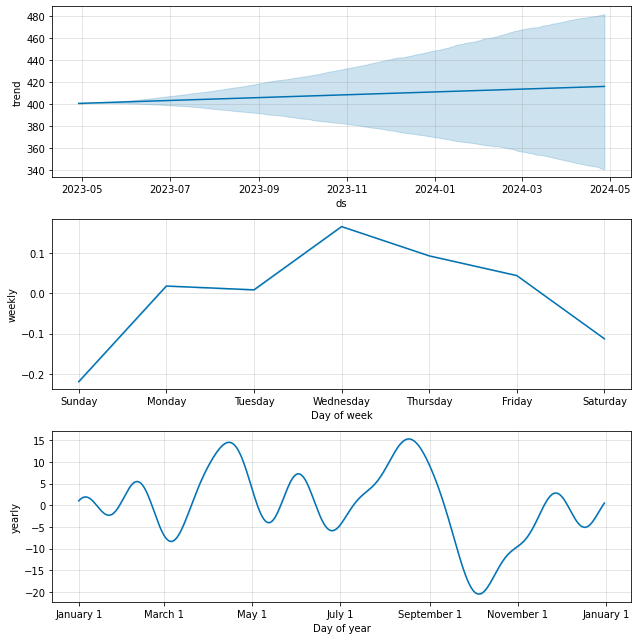

In [25]:
# Plot the forecasted data
model.plot(forecast, xlabel='Date', ylabel='SPY Price')
plt.xlim(dt.datetime.today() - dt.timedelta(days=730), dt.datetime.today() + dt.timedelta(days=365))
plt.ylim(forecast['yhat'].mean()*0.75, forecast['yhat'].mean()*1.25)

# Plot the forecasted trend and seasonality components
fig = model.plot_components(forecast)
plt.show()

In [26]:
#Past 1 year data
spy_ohlc_df = yf.download(text_input, start=dt.date.today() - dt.timedelta(days=365), end=dt.date.today())
df1=spy_ohlc_df.reset_index()

# spy_ohlc_df = yf.download(text_input, start=dt.date.today() - dt.timedelta(days=7), end=dt.date.today())
# df1=spy_ohlc_df.reset_index()

[*********************100%***********************]  1 of 1 completed


In [27]:
start_time = pd.Timestamp(df1['Date'][0])
end_time = pd.Timestamp(df1['Date'][len(df1)-1])
time_range = pd.date_range(start_time, end_time, freq=df1['Date'][1] - df1['Date'][0] )

time_list = time_range.tolist()


time_list = pd.to_datetime(time_list)
index = range(len(time_list))

df_dates = pd.DataFrame(index, columns = ['Date'])
df_dates['Date'] = time_list

#Ensure all reading time exists, fill with 0 for missing reading times
df1 = pd.merge(df1, df_dates, on='Date', how='right')

df1.fillna(method='ffill', inplace=True)

In [28]:
# fig, ax = plt.subplots()
# fig.set_size_inches(15,6)
# sns.lineplot(x = 'Datetime', y = 'Close', data = df1)
# plt.show()

In [29]:
# Load SPY price data
spy_data = df1
spy_data = df1[['Date', 'Close']]
#spy_data = df1[['Date', 'Close']]
spy_data.columns = ['ds', 'y']

# Initialize Prophet model
model = Prophet()

# Fit the model on SPY data
model.fit(spy_data)

# Create future dates for forecasting
future_dates = model.make_future_dataframe(periods=30, include_history=False)

# Make predictions for future dates
forecast = model.predict(future_dates)


13:06:08 - cmdstanpy - INFO - Chain [1] start processing
13:06:08 - cmdstanpy - INFO - Chain [1] done processing


# 30 Days Outlook

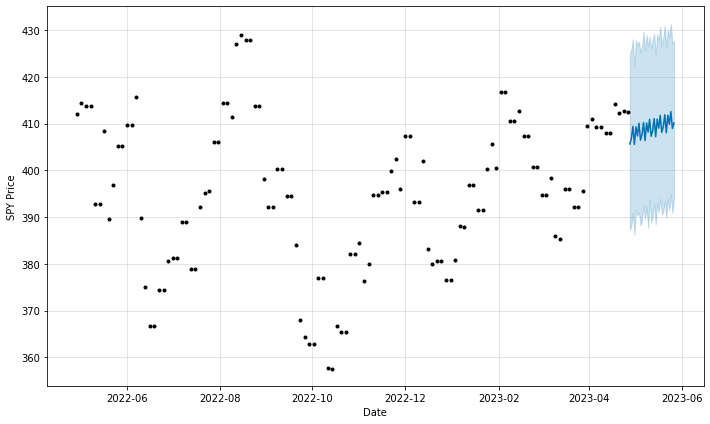

(19416.0, 19506.0)

(368.11464881872433, 449.9179041117742)

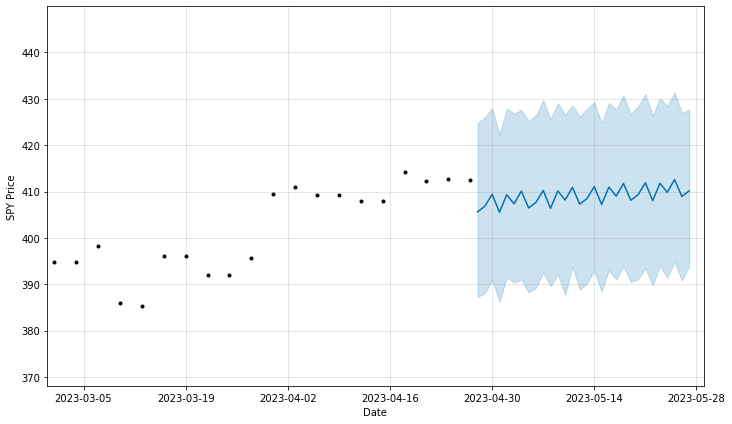

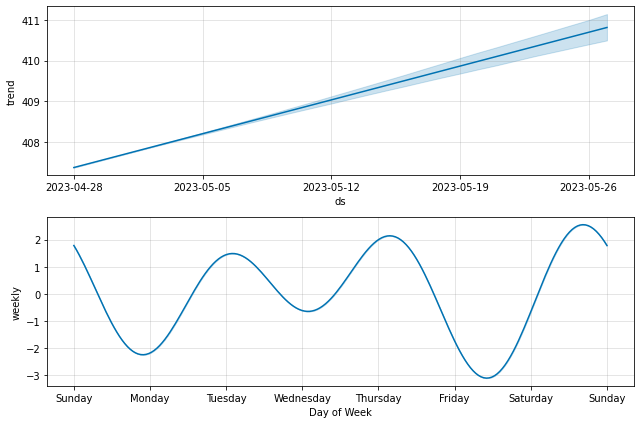

In [30]:
# Plot the forecasted data
model.plot(forecast, xlabel='Date', ylabel='SPY Price')
plt.xlim(dt.date.today() - dt.timedelta(days=60), dt.date.today() + dt.timedelta(days=30))
plt.ylim(forecast['yhat'].mean()*0.9, forecast['yhat'].mean()*1.1)

# Plot the forecasted trend and seasonality components
fig = model.plot_components(forecast)
plt.show()

In [31]:
#Past week data
spy_ohlc_df = yf.download(text_input, start=dt.date.today() - dt.timedelta(days=7), end=dt.date.today(), interval='1m')
df1=spy_ohlc_df.reset_index()

# spy_ohlc_df = yf.download(text_input, start=dt.date.today() - dt.timedelta(days=7), end=dt.date.today())
# df1=spy_ohlc_df.reset_index()

[*********************100%***********************]  1 of 1 completed


In [32]:
start_time = pd.Timestamp(df1['Datetime'][0])
end_time = pd.Timestamp(df1['Datetime'][len(df1)-1])
time_range = pd.date_range(start_time, end_time, freq=df1['Datetime'][1] - df1['Datetime'][0] )

time_list = time_range.tolist()

In [33]:
time_list = pd.to_datetime(time_list)
index = range(len(time_list))

df_dates = pd.DataFrame(index, columns = ['Datetime'])
df_dates['Datetime'] = time_list

In [34]:
#Ensure all reading time exists, fill with 0 for missing reading times
df1 = pd.merge(df1, df_dates, on='Datetime', how='right')

In [35]:
df1.fillna(method='ffill', inplace=True)

In [36]:
# fig, ax = plt.subplots()
# fig.set_size_inches(15,6)
# sns.lineplot(x = 'Datetime', y = 'Close', data = df1)
# plt.show()

In [37]:
# Load SPY price data
spy_data = df1
spy_data = df1[['Datetime', 'Close']]
#spy_data = df1[['Date', 'Close']]
spy_data.columns = ['ds', 'y']

# Initialize Prophet model
model = Prophet()

# Fit the model on SPY data
model.fit(spy_data)

# Create future dates for forecasting
future_dates = model.make_future_dataframe(periods=2880, freq='T', include_history=False)


# Make predictions for future dates
forecast = model.predict(future_dates)


13:06:10 - cmdstanpy - INFO - Chain [1] start processing
13:06:15 - cmdstanpy - INFO - Chain [1] done processing


In [38]:
# fig = model.plot(forecast, xlabel='Date', ylabel='SPY Price')
# fig.set_size_inches(15,6)
# plt.title('Forecasted Price')
# plt.xlabel('dt')
# plt.ylabel('Price')
# plt.show()

# One Day Outlook

In [39]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-04-28 16:01:00,414.599055,414.534810,415.372072,414.599055,414.599055,0.357478,0.357478,0.357478,0.357478,0.357478,0.357478,0.0,0.0,0.0,414.956532
1,2023-04-28 16:02:00,414.601398,414.547150,415.338803,414.601398,414.601398,0.356991,0.356991,0.356991,0.356991,0.356991,0.356991,0.0,0.0,0.0,414.958389
2,2023-04-28 16:03:00,414.603741,414.567198,415.376735,414.603741,414.603741,0.356562,0.356562,0.356562,0.356562,0.356562,0.356562,0.0,0.0,0.0,414.960303
3,2023-04-28 16:04:00,414.606084,414.527222,415.379970,414.606084,414.606084,0.356191,0.356191,0.356191,0.356191,0.356191,0.356191,0.0,0.0,0.0,414.962275
4,2023-04-28 16:05:00,414.608428,414.557313,415.381160,414.608428,414.608428,0.355877,0.355877,0.355877,0.355877,0.355877,0.355877,0.0,0.0,0.0,414.964305


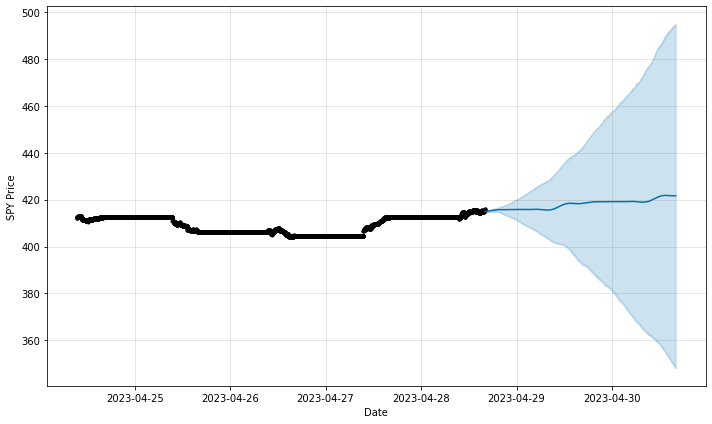

(19474.0, 19477.0)

(409.6127249971946, 426.33161173177405)

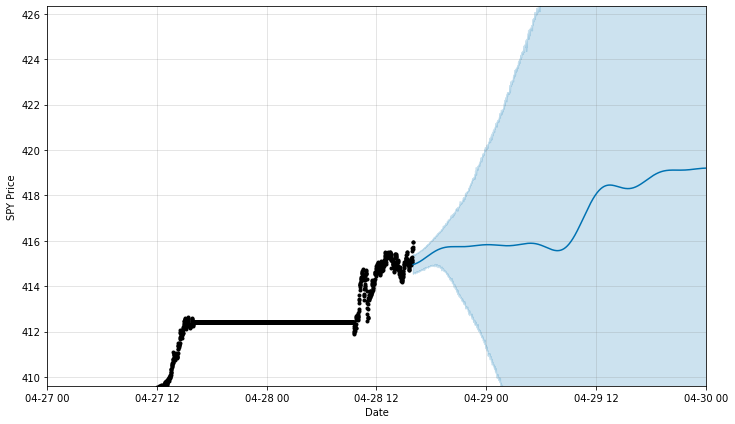

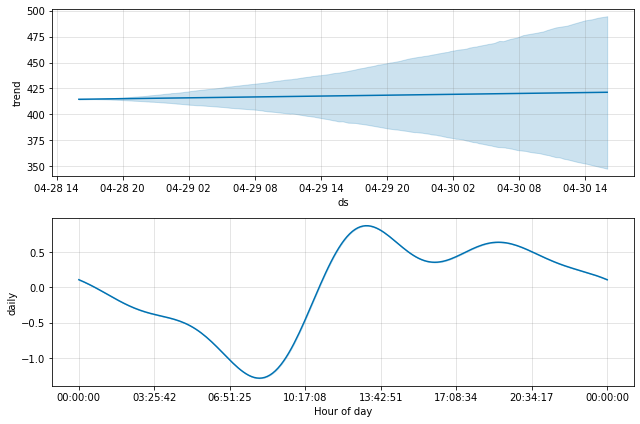

In [40]:
# Plot the forecasted data
model.plot(forecast, xlabel='Date', ylabel='SPY Price')
plt.xlim(dt.date.today() - dt.timedelta(days=2), dt.date.today() + dt.timedelta(days=1))
plt.ylim(forecast['yhat'].mean()*0.98, forecast['yhat'].mean()*1.02)

# Plot the forecasted trend and seasonality components
fig = model.plot_components(forecast)
plt.show()